##Navya Mamoria

####Task #1 : Prediction using Supervised ML

* Problem Statement: Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* You can use R, Python, SAS Enterprise Miner or any other tool
* Data can be found at http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/ day?

##Importing Libraries

In [32]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


##Importing the data

In [33]:
# Reading data from the source
df=pd.read_csv("student_scores .csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [34]:
df.shape

(25, 2)

In [35]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [37]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Exploring the dataset

To analyze the relationship between data.

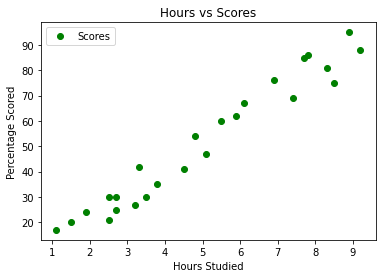

In [38]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o',color='green')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

From the graph we can see that there is a positive linear relation between the number of hours studied and percentage score.

##Plotting the regression line

Text(0.5, 1.0, 'Plotting the regression line')

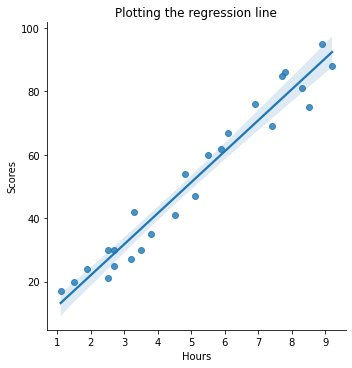

In [39]:
sns.lmplot(x="Hours",y="Scores", data=df)
plt.title("Plotting the regression line")
#sns.regplot(x="Hours", y="Scores", data=df)

##Data Preprocessing

In [40]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [41]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

##Train test splitting

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##Training the Simple Linear Regression model on the Training set

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train.reshape(-1,1), y_train) 

LinearRegression()

##Making predictions

In [44]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [45]:
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

##Comparison of test data with the predicted data

In [46]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visualizing the training result

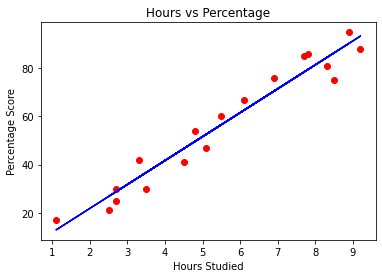

In [47]:
%matplotlib inline

# Plotting for the test data
plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model.predict(X_train),color='blue');
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

##Visualising the Test set results

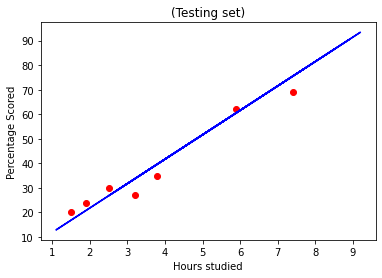

In [48]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()


In [49]:
# Estimating training and test score
print("Training Score:",model.score(X_train,y_train))
print("Testing Score:",model.score(X_test,y_test))

Training Score: 0.9484509249326872
Testing Score: 0.9367661043365056


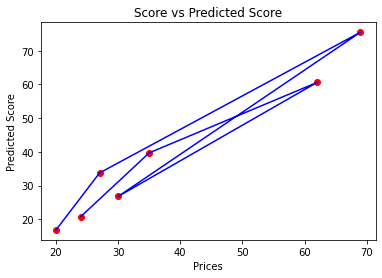

In [50]:
# Plotting the graph to depict the difference between the actual and predicted value

plt.scatter(y_test,y_pred,c='red')
plt.plot(y_test,y_pred,c='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted Score")
plt.title("Score vs Predicted Score")
plt.show()

In [51]:
# Testing the model with our own data
print("Predicted Score = {}".format(model.predict([[9.25]])))

Predicted Score = [93.89272889]


###How did we get the predicted score as 93.89272889% for a student who studied for 9.25 hrs/day?
According to Linear regression,
Y = mX + c

where,
* X -> Independent variable 
* Y -> Dependent variable
* m -> Coefficient of the independent variable
* c -> Intercept

In [52]:
model.coef_

array([9.94167834])

In [53]:
model.intercept_

1.9322042531516601

In [54]:

# The result of this calculation indicates on how I arrived at 93.89272889% for a student who studied for 9.25 hrs/day
9.94167834*9.25 + 1.9322042531516601

93.89272889815166

##Model Evaluation

In [55]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, model.predict(X_test))) 
print('r^2 score error:',r2_score(y_test, model.predict(X_test)))
print('Mean squared error: ',mean_squared_error(y_test, model.predict(X_test)))

Mean absolute error: 4.130879918502482
r^2 score error: 0.9367661043365056
Mean squared error:  20.33292367497996


R-2 gives the score of model fit and in this case we have r^2 score=0.9367661043365056  which is actually a great score for this model.